In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

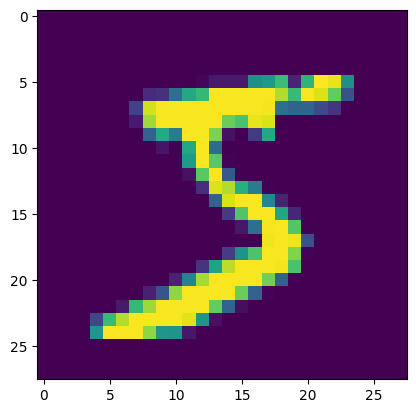

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 30634 (119.66 KB)
Trainable params: 30634 (119.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.3426 - accuracy: 0.8977 - val_loss: 0.1949 - val_accuracy: 0.9440
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1662 - accuracy: 0.9496 - val_loss: 0.1402 - val_accuracy: 0.9578
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1255 - accuracy: 0.9611 - val_loss: 0.1287 - val_accuracy: 0.9609
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1051 - accuracy: 0.9671 - val_loss: 0.1225 - val_accuracy: 0.9620
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0882 - accuracy: 0.9728 - val_loss: 0.1123 - val_accuracy: 0.9641
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0763 - accuracy: 0.9759 - val_loss: 0.1122 - val_accuracy: 0.9676
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0693 - accuracy: 0.9780 - val_loss: 0.1140 - val_accuracy:

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.968

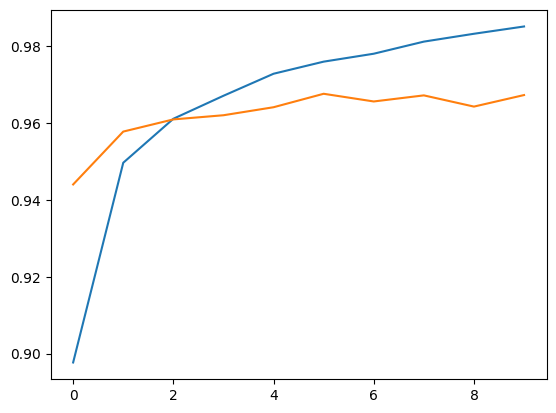

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])